# Implemetação de uma rede neural perceptron

## 1) Importar bibliotecas necessárias 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2) Gerar Dataset

Vetor de pesos [0. 0. 0.]


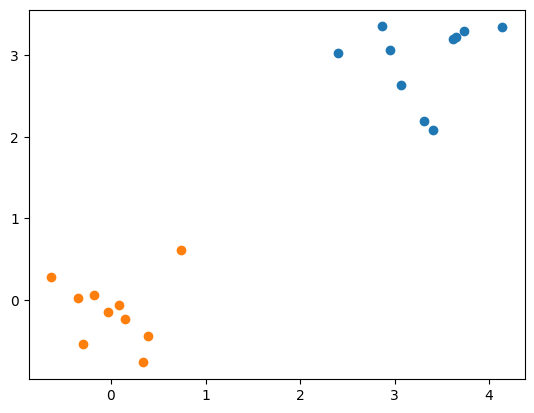

    Atributo 1  Atributo 2  Label
0        2.404       3.029      1
1        3.409       2.079      1
2        2.864       3.354      1
3        3.618       3.204      1
4        3.311       2.197      1
5        3.655       3.227      1
6        4.137       3.345      1
7        2.956       3.062      1
8        3.069       2.633      1
9        3.737       3.294      1
10       0.396      -0.442     -1
11      -0.633       0.286     -1
12      -0.344       0.027     -1
13      -0.035      -0.148     -1
14      -0.296      -0.545     -1
15       0.736       0.611     -1
16       0.152      -0.230     -1
17       0.344      -0.766     -1
18       0.089      -0.059     -1
19      -0.181       0.061     -1


In [3]:
# Matriz de pesos - Primeiro elem. bias
w = np.zeros(3)
print("Vetor de pesos", w)

# Matriz de atributos
# Classe 1
x1_class1 = np.around(np.random.normal(3, 0.5, 10), 3)
x2_class1 = np.around(np.random.normal(3, 0.5, 10), 3)

# Classe 2
x1_class2 = np.around(np.random.normal(0, 0.5, 10), 3)
x2_class2 = np.around(np.random.normal(0, 0.5, 10), 3)

plt.scatter(x1_class1, x2_class1)
plt.scatter(x1_class2, x2_class2)
plt.show()


# Inserir dados em um dataframe 
x1 = np.append(x1_class1, x1_class2)
x2 = np.append(x2_class1, x2_class2)

df = pd.DataFrame(x1, columns=['Atributo 1'])
df.insert(1,"Atributo 2", x2)
df.insert(2,"Label", [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])



print(df)



## 3) Ativação e algoritimo de aprendizado do perceptron

Para o presente caso:

$$
w_1 . x_1 + w_2 . x_2 + b = 0
$$

Resposta desejada

    . Classe 1 ->  1
    . Classe 2 ->  -1

### 3.1) Classe Perceptron

In [4]:
class Perceptron:
    def __init__(self, learnRate, epochs):
        self.learnRate = learnRate
        self.epochs = epochs
        self.w = np.zeros(3)

    # Função de previsão da rede
    def predict(self, x1, x2):

        y = self.w[0] * x1 + self.w[1] * x2 + self.w[2]
        if y >= 0:
            return 1
    
        return -1
    
    # Função de aprendizado
    def learn(self, label, output, x1, x2):
        self.w[0] += self.learnRate * (label - output) * x1
        self.w[1] += self.learnRate * (label - output) * x2
        self.w[2] += self.learnRate * (label - output)

    # Função de treinamento
    def fit(self, X, labels):
        for _ in range(self.epochs):
            for x, label in zip(X, labels):
                y = self.predict(x[0], x[1])
                self.learn(label, y, x[0], x[1])

            # Imprime a fronteira de decisão em cada época
            num = np.linspace(-2,8,50)
            f = - (self.w[0] * num + self.w[2]) / self.w[1]
            plt.plot(num, f)

        plt.scatter(X[:, 0], X[:, 1])
        plt.show()
        
    # Função para imprimir fronteira de decisão 
    def printFrontier(self, X):
        for x in X:
            plt.scatter(x[0], x[1])

        x = np.linspace(-2,4,10)

        f = - (self.w[0] * x + self.w[2]) / self.w[1]
        plt.plot(x, f)

        plt.show()

### 3.4) Treinamento:

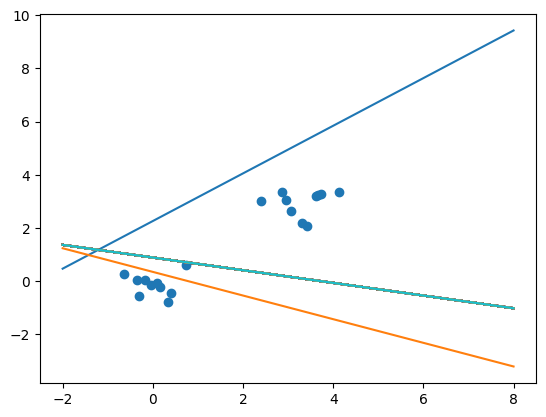

In [5]:
# Matriz com as features 
X = df[df.columns.difference(['Label'])].values

# Vetor com as classes 
labels = df['Label'].values

perceptron = Perceptron(0.1, 100)
perceptron.fit(X, labels)


## 4) Análise da fronteira de decisão 

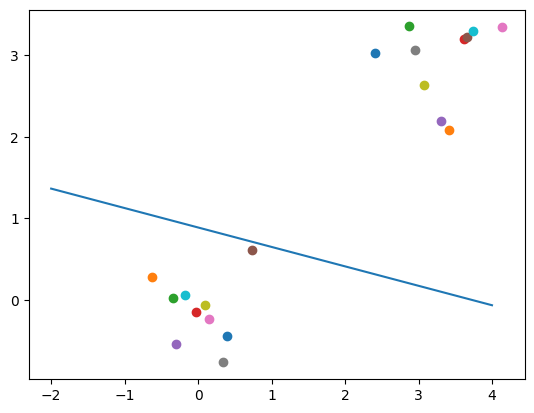

In [6]:
perceptron.printFrontier(X)

### 5) Calcular matriz de confusão

#### 5.1) Gerar Dataframe

In [7]:
# Matriz de atributos de teste
# Classe 1
x1_class1TESTE = np.around(np.random.normal(3, 0.5, 10), 3)
x2_class1TESTE = np.around(np.random.normal(3, 0.5, 10), 3)

# Classe 2
x1_class2TESTE = np.around(np.random.normal(0, 0.5, 10), 3)
x2_class2TESTE = np.around(np.random.normal(0, 0.5, 10), 3)

# Inserir dados em um dataframe 
x1TESTE = np.append(x1_class1TESTE, x1_class2TESTE)
x2TESTE = np.append(x2_class1TESTE, x2_class2TESTE)

df = pd.DataFrame(x1TESTE, columns=['Atributo 1'])
df.insert(1,"Atributo 2", x2)
df.insert(2,"Label", [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

print(df)

    Atributo 1  Atributo 2  Label
0        2.931       3.029      1
1        3.299       2.079      1
2        3.125       3.354      1
3        2.568       3.204      1
4        3.853       2.197      1
5        3.011       3.227      1
6        2.814       3.345      1
7        3.173       3.062      1
8        2.991       2.633      1
9        2.562       3.294      1
10      -0.149      -0.442     -1
11      -0.407       0.286     -1
12      -0.006       0.027     -1
13      -0.060      -0.148     -1
14      -0.678      -0.545     -1
15      -0.492       0.611     -1
16      -0.153      -0.230     -1
17      -0.817      -0.766     -1
18       0.290      -0.059     -1
19       0.535       0.061     -1


#### 5.2) Validar modelo

In [9]:


# Matriz com as features 
X_teste = df[df.columns.difference(['Label'])].values

# Vetor com as classes 
labels_teste = df['Label'].values

for x, label in zip(X_teste, labels_teste):
    y = perceptron.predict(x[0], x[1])

[2.931 3.029]
[3.299 2.079]
[3.125 3.354]
[2.568 3.204]
[3.853 2.197]
[3.011 3.227]
[2.814 3.345]
[3.173 3.062]
[2.991 2.633]
[2.562 3.294]
[-0.149 -0.442]
[-0.407  0.286]
[-0.006  0.027]
[-0.06  -0.148]
[-0.678 -0.545]
[-0.492  0.611]
[-0.153 -0.23 ]
[-0.817 -0.766]
[ 0.29  -0.059]
[0.535 0.061]
